## Watertank Level

In [139]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [140]:
data_fields = [
    "applicationID", "applicationName", "data_boardVoltage", "data_distance", 
    "devEUI", "fCnt", "fPort", "host", "nodeName", "rxInfo_altitude_0", 
    "rxInfo_altitude_1", "rxInfo_latitude_0", "rxInfo_latitude_1", 
    "rxInfo_loRaSNR_0", "rxInfo_loRaSNR_1", "rxInfo_longitude_0", 
    "rxInfo_longitude_1", "rxInfo_mac_0", "rxInfo_mac_1", "rxInfo_name_0", 
    "rxInfo_name_1", "rxInfo_rssi_0", "rxInfo_rssi_1", "time", "txInfo_adr", 
    "txInfo_codeRate", "txInfo_dataRate_bandwidth", "txInfo_dataRate_modulation", 
    "txInfo_dataRate_spreadFactor", "txInfo_frequency"
]

df_water_tank = pd.read_csv(r'data/WaterTankLevel.csv', header=3, usecols=data_fields)
df_water_tank["time"] = pd.to_datetime(df_water_tank["time"])

In [141]:
RADIUS = 5
df_water_tank["Volume"] = RADIUS**2 * np.pi * (df_water_tank["data_distance"]/1000)**2
df_water_tank["Vazao"] = df_water_tank["Volume"].diff() / df_water_tank["time"].diff().dt.total_seconds()

In [142]:
dfs_water_tank_per_node = {app_id: df_node for app_id, df_node in df_water_tank.groupby("devEUI")}
ids = list(dfs_water_tank_per_node.keys())


In [143]:
data_volume = []
for id in ids:
    max_volume = dfs_water_tank_per_node[id]["Volume"].max()
    min_volume = dfs_water_tank_per_node[id]["Volume"].min()
    mean_volume = dfs_water_tank_per_node[id]["Volume"].mean()
    std_volume = dfs_water_tank_per_node[id]["Volume"].std()

    data_volume.append([id, max_volume, min_volume, mean_volume, std_volume])

df_estatisticas = pd.DataFrame(data_volume, columns=["Device ID", "Max Volume", "Min Volume", "Mean Volume", "Std Volume"])
df_estatisticas



,Device ID,Max Volume,Min Volume,Mean Volume,Std Volume
0,0004a30b00001001,1297.809597,1.168987,377.876286,408.785174
1,0004a30b00001002,1304.842916,0.119459,436.975320,378.555444
2,0004a30b00001003,1317.036144,0.017671,370.079051,349.693830
3,0004a30b00001004,1270.498082,0.013273,418.302458,371.964309
4,0004a30b00001005,1308.687283,0.006362,490.742940,422.969700
5,0004a30b00001006,1268.603466,0.025447,383.387696,386.103176
6,0004a30b00001007,1310.611587,0.066052,473.381963,401.439226
7,0004a30b00001008,1287.613244,0.229022,419.180479,369.796633


In [144]:
data_vazao = []
for id in ids:
    max_vazao = dfs_water_tank_per_node[id]["Vazao"].max()
    min_vazao = dfs_water_tank_per_node[id]["Vazao"].min()
    mean_vazao = dfs_water_tank_per_node[id]["Vazao"].mean()
    std_vazao = dfs_water_tank_per_node[id]["Vazao"].std()

    data_vazao.append([id, max_vazao, min_vazao, mean_vazao, std_vazao])

df_estatisticas_vazao = pd.DataFrame(data_vazao, columns=["Device ID", "Max Vazao", "Min Vazao", "Mean Vazao", "Std Vazao"])
df_estatisticas_vazao

,Device ID,Max Vazao,Min Vazao,Mean Vazao,Std Vazao
0,0004a30b00001001,159.524150,-161.588519,-0.988103,75.555223
1,0004a30b00001002,147.236957,-128.155648,-0.590068,62.427918
2,0004a30b00001003,140.516800,-157.098543,-0.050022,59.168171
3,0004a30b00001004,147.579413,-150.266271,-0.242043,70.014339
4,0004a30b00001005,154.780049,-162.334370,-0.217487,70.822138
5,0004a30b00001006,153.904347,-157.863524,0.245912,64.495853
6,0004a30b00001007,151.457748,-143.663931,0.018943,71.031890
7,0004a30b00001008,142.751115,-148.733536,0.185937,68.806990


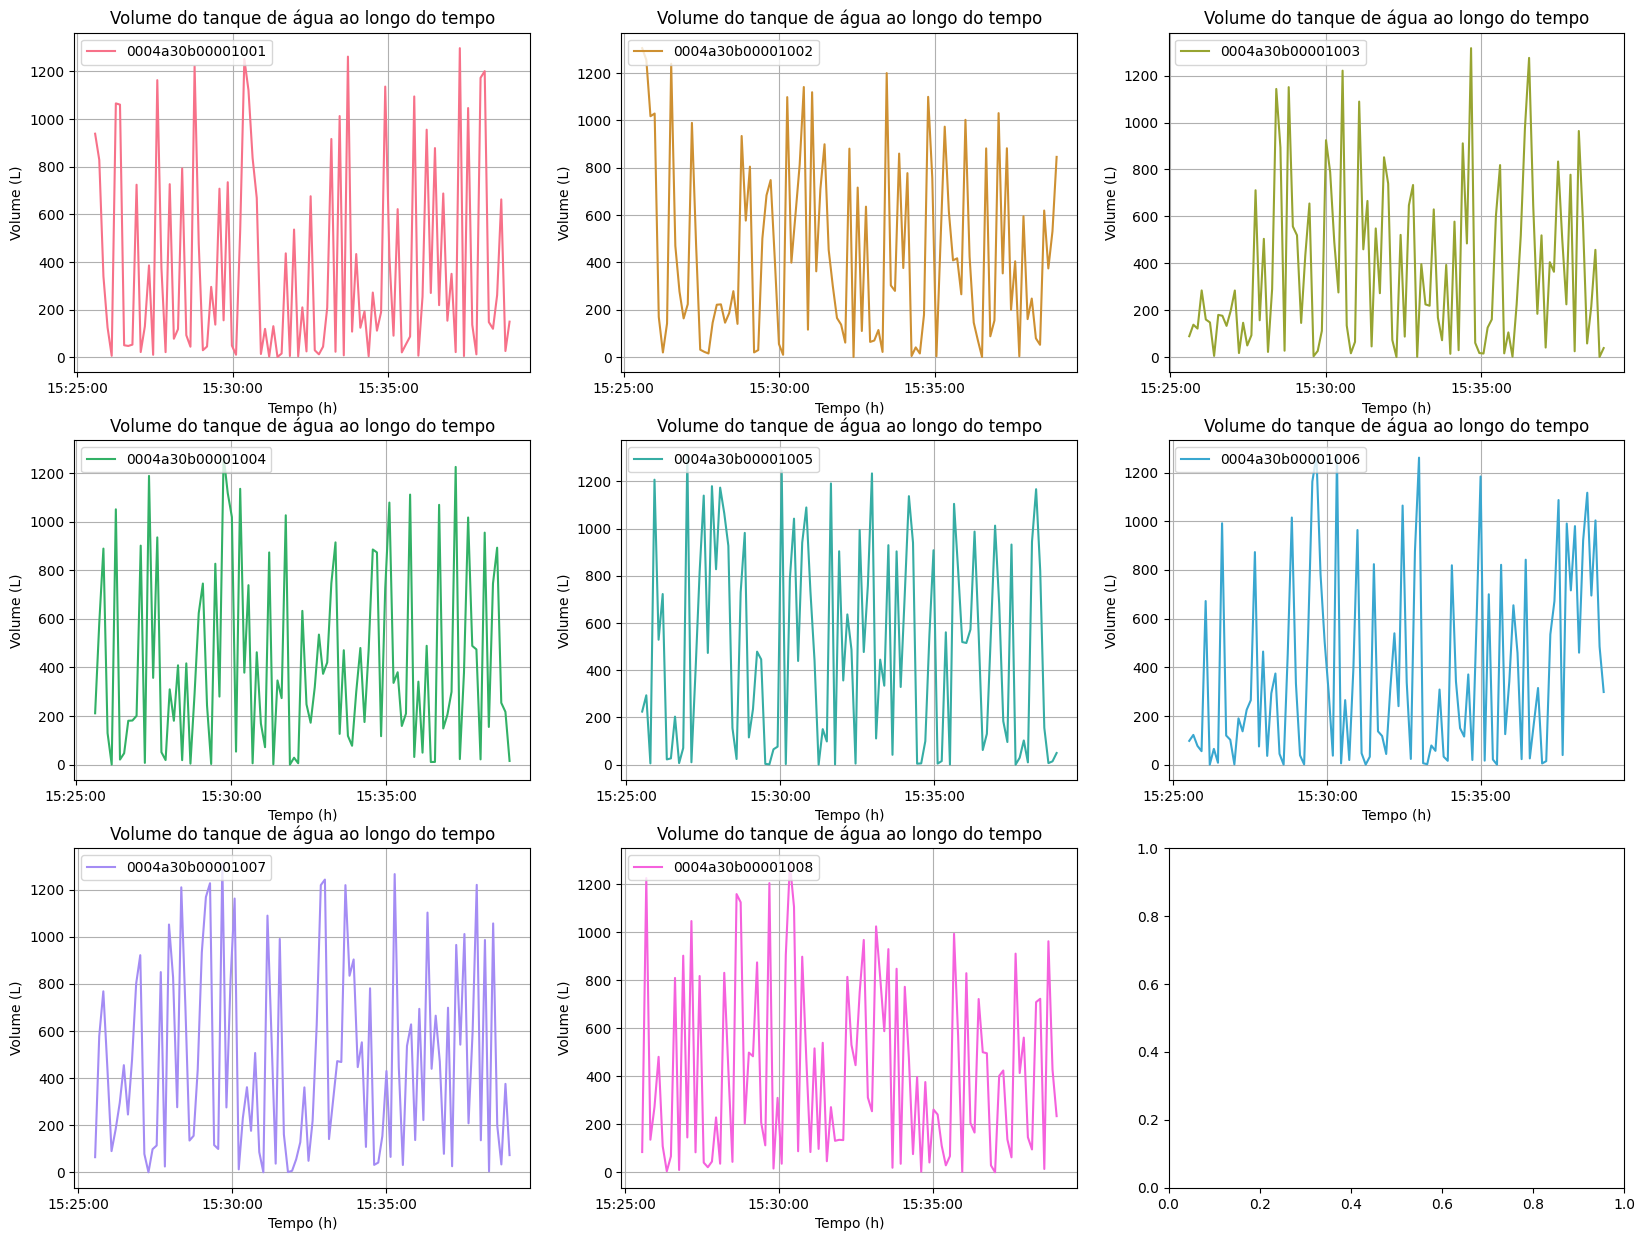

In [145]:
colors = sns.color_palette("husl", len(ids))

ncols = 3
nrows = (len(ids) + ncols - 1) // ncols

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, nrows*5))
axes = axes.flatten()
for ax, id in zip(axes,ids):
    df_water_tank_id = dfs_water_tank_per_node[id]
    sns.lineplot(ax=ax, x="time", y="Volume", data=df_water_tank_id, label=id, color=colors.pop(0))
    ax.set_xlabel("Tempo (h)")
    ax.set_ylabel("Volume (L)")
    ax.set_title("Volume do tanque de água ao longo do tempo") 
    ax.legend(loc='upper left')
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
    ax.grid(True)
plt.show()

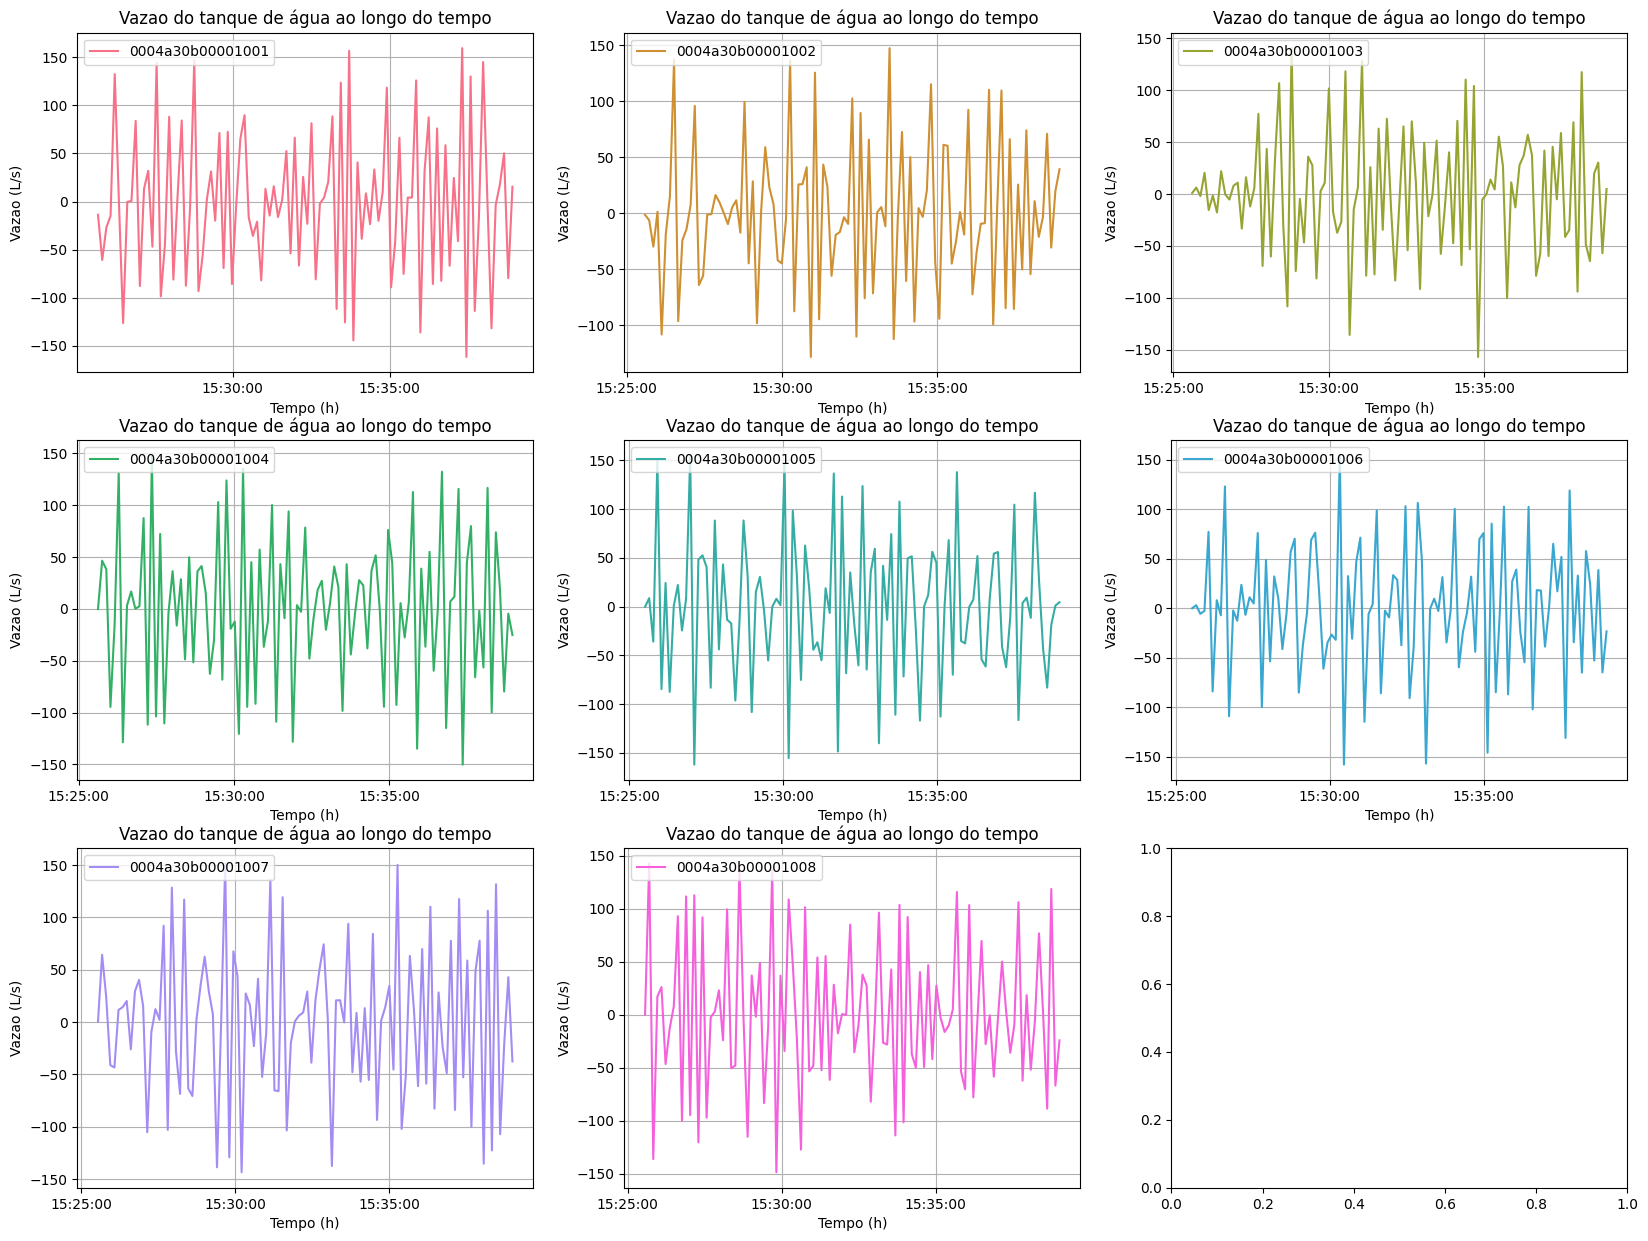

In [146]:
colors = sns.color_palette("husl", len(ids))

ncols = 3
nrows = (len(ids) + ncols - 1) // ncols

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, nrows*5))
axes = axes.flatten()
for ax, id in zip(axes,ids):
    df_water_tank_id = dfs_water_tank_per_node[id]
    sns.lineplot(ax=ax, x="time", y="Vazao", data=df_water_tank_id, label=id, color=colors.pop(0))
    ax.set_xlabel("Tempo (h)")
    ax.set_ylabel("Vazao (L/s)")
    ax.set_title("Vazao do tanque de água ao longo do tempo") 
    ax.legend(loc='upper left')
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
    ax.grid(True)
plt.show()